In [14]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Car.csv").iloc[:,1:]
print(df)
#goal--->to predict the price of second hand cars


                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8122             Hyundai i20 Magna  2013         320000     110000  Petrol   
8123         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8124        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8125               Tata Indigo CR4  2013         290000      25000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage

In [15]:
#check the null values
print(df.isna().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           221
seats            221
dtype: int64


In [16]:
df=df.dropna()
print(df.isna().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64


In [17]:
df=df.reset_index(drop=True)


In [18]:
#seats
print(df["seats"].value_counts())


seats
5.0     6254
7.0     1120
8.0      235
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: count, dtype: int64


In [19]:
df=df.drop(columns="torque") #as unsynchronize or data not following a particular pattern so that we can split or apply any func.so drop 
print(df)

                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
7901             Hyundai i20 Magna  2013         320000     110000  Petrol   
7902         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
7903        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
7904               Tata Indigo CR4  2013         290000      25000  Diesel   
7905               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage

In [20]:
def abc(x):
    return x.split()[0]
df["max_power"]=df["max_power"].apply(abc)
print(df["max_power"])



0           74
1       103.52
2           78
3           90
4         88.2
         ...  
7901     82.85
7902       110
7903      73.9
7904        70
7905        70
Name: max_power, Length: 7906, dtype: object


In [21]:
# df["max_power"]=df["max_power"].astype("float32") #here we will find error as some data present that cannot be converted to float
# print(df["max_power"])

In [22]:
# try:
#     print(float("abc"))
# except: 
#     print("catch") 

In [23]:
index=[]   #used to find index of uncommon or diff datatype value if there in column , we need to drop it,after that change datatype of column
for i in range(len(df)):
    try:
      float(df.iloc[i,-2])  #converting data to float 
 
    except:
        index.append(i)
print(index)


[840]


In [24]:
# print(df.iloc[840])
df=df.drop(index=840).reset_index(drop=True)
# print(df["max_power"])

In [25]:
print(df["max_power"])

0           74
1       103.52
2           78
3           90
4         88.2
         ...  
7900     82.85
7901       110
7902      73.9
7903        70
7904        70
Name: max_power, Length: 7905, dtype: object


In [26]:
df["max_power"]=df["max_power"].astype("float32")
print(df["max_power"])

0        74.000000
1       103.519997
2        78.000000
3        90.000000
4        88.199997
           ...    
7900     82.849998
7901    110.000000
7902     73.900002
7903     70.000000
7904     70.000000
Name: max_power, Length: 7905, dtype: float32


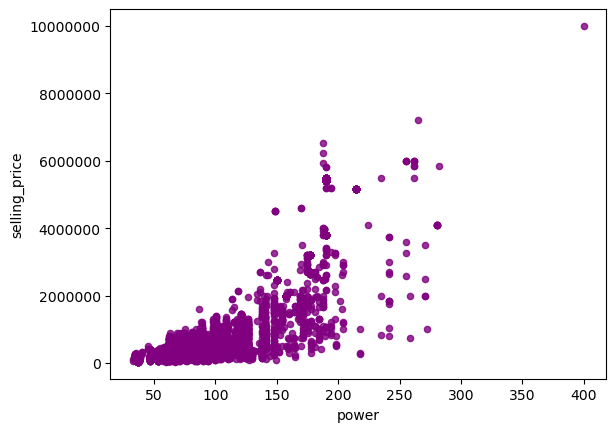

In [27]:
#max_power vs selling price---->
import matplotlib.pyplot as plt
plt.ticklabel_format(style="plain") #for actual value change in graph  
plt.scatter(df["max_power"],df["selling_price"],color="purple",alpha=0.8,s=20) #range of alpha is 0-1 # s value can be any
plt.xlabel("power")
plt.ylabel("selling_price")
plt.show()


In [28]:
#engine and mileage
def abc(x):
    return x.split()[0]
df["engine"]=df["engine"].apply(abc)
print(df["engine"])

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
7900    1197
7901    1493
7902    1248
7903    1396
7904    1396
Name: engine, Length: 7905, dtype: object


In [29]:
index=[]
for i in range(len(df)):
    try:
      float(df.iloc[i,-3])
 
    except:
        index.append(i)
print(index)

[968]


In [30]:
df=df.drop(index=968).reset_index(drop=True)
print(df["engine"])

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
7899    1197
7900    1493
7901    1248
7902    1396
7903    1396
Name: engine, Length: 7904, dtype: object


In [31]:
df["engine"]=df["engine"].astype("float32")
print(df["engine"])

0       1248.0
1       1498.0
2       1497.0
3       1396.0
4       1298.0
         ...  
7899    1197.0
7900    1493.0
7901    1248.0
7902    1396.0
7903    1396.0
Name: engine, Length: 7904, dtype: float32


In [32]:
def abc(x):
    return x.split()[0]
df["mileage"]=df["mileage"].apply(abc)
print(df["mileage"])

0        23.4
1       21.14
2        17.7
3        23.0
4        16.1
        ...  
7899     18.5
7900     16.8
7901     19.3
7902    23.57
7903    23.57
Name: mileage, Length: 7904, dtype: object


In [33]:
df["mileage"]=df["mileage"].astype("float32")
print(df["mileage"])

0       23.400000
1       21.139999
2       17.700001
3       23.000000
4       16.100000
          ...    
7899    18.500000
7900    16.799999
7901    19.299999
7902    23.570000
7903    23.570000
Name: mileage, Length: 7904, dtype: float32


In [34]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248.0,74.000000,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498.0,103.519997,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700001,1497.0,78.000000,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396.0,90.000000,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298.0,88.199997,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7899,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.500000,1197.0,82.849998,5.0
7900,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.799999,1493.0,110.000000,5.0
7901,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.299999,1248.0,73.900002,5.0
7902,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.570000,1396.0,70.000000,5.0


In [35]:
print(df["owner"].value_counts())

owner
First Owner             5214
Second Owner            2015
Third Owner              510
Fifth                     86
Fourth & Above Owner      74
Test Drive Car             5
Name: count, dtype: int64


In [36]:
df["owner"]=df["owner"].replace({"Fifth":"Fourth & Above Owner"}) #just for understanding - value change also by df["owner"].replace("abc","xyz") or by slicing ,but it will do one by one value change or by df["owner"].replace({"name":"abc"},{"name:"xyz"}) 
print(df["owner"].value_counts())

owner
First Owner             5214
Second Owner            2015
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: count, dtype: int64


In [37]:
f=df["owner"].isin(["Test Drive Car"]) #we are removing them as they are hampering the continuity of our data/this data is putting problem when ranking is concerned in our data
i=df.index[f] #index used for rows #created filter #index=f can also give 
#df.drop(index=f) #can do by this method also simplest instead of 2 lines
df=df.drop(i) #for removing index #rows remove
print(df["owner"].value_counts())
#we will apply label encoding on it


owner
First Owner             5214
Second Owner            2015
Third Owner              510
Fourth & Above Owner     160
Name: count, dtype: int64


In [38]:
print(df["transmission"].value_counts())
#we will apply label encoder (as 2 values so we drop one column in both(like in Gender also),so same thing , so why not apply label instead of ohe rather there is no ranking then also.

transmission
Manual       6862
Automatic    1037
Name: count, dtype: int64


In [39]:
print(df["seller_type"].value_counts())
#OneHotEncoder here as no ranking seeing through seaborn graph

seller_type
Individual          6561
Dealer              1102
Trustmark Dealer     236
Name: count, dtype: int64


<Axes: xlabel='selling_price', ylabel='seller_type'>

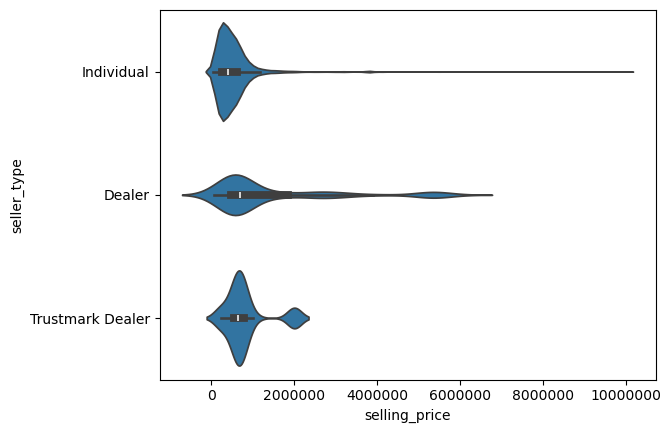

In [40]:
#seaborn -> creative than matplotlib  #used when data transforming
import seaborn
plt.gca().xaxis.get_major_formatter().set_scientific(False) #shows original notation instead of scientific
seaborn.violinplot(data=df,x="selling_price",y="seller_type")
#by visually seeing we can decide which encoder to apply in confusion ,if it brings impact then label encoding ,if like same-same thn ohe as no much ranking Ques???????
#like here no ranking showing same area all present ,selling price not increasing with change of type so ohe(non ordinal(no ranking))  
#matplotlib also has violinplot but it makes diff diff graphs for ind,dealer and trade.

In [41]:
print(df["fuel"].value_counts())

fuel
Diesel    4298
Petrol    3514
CNG         52
LPG         35
Name: count, dtype: int64


<Axes: xlabel='selling_price', ylabel='fuel'>

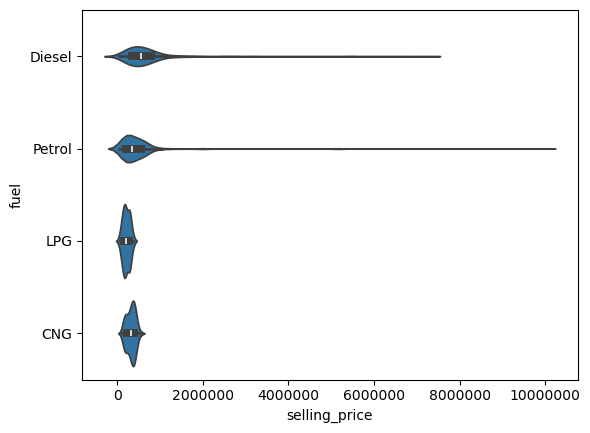

In [42]:
import seaborn
plt.gca().xaxis.get_major_formatter().set_scientific(False) #shows original notation instead of scientific
seaborn.violinplot(data=df,x="selling_price",y="fuel")


In [43]:
# f=df["fuel"].isin(["LPG","CNG"]
# df["Eco"]=df[""].replace
# df[
df["fuel"]=df["fuel"].replace({"CNG":"Eco","LPG":"Eco"})


<Axes: xlabel='selling_price', ylabel='fuel'>

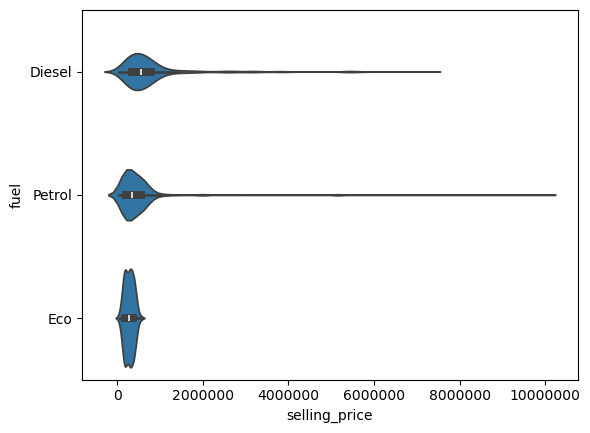

In [44]:
plt.gca().xaxis.get_major_formatter().set_scientific(False) #shows original notation instead of scientific
seaborn.violinplot(data=df,x="selling_price",y="fuel")
# synchronization showing by merging to apply label as ranking doing (ordinal values) 

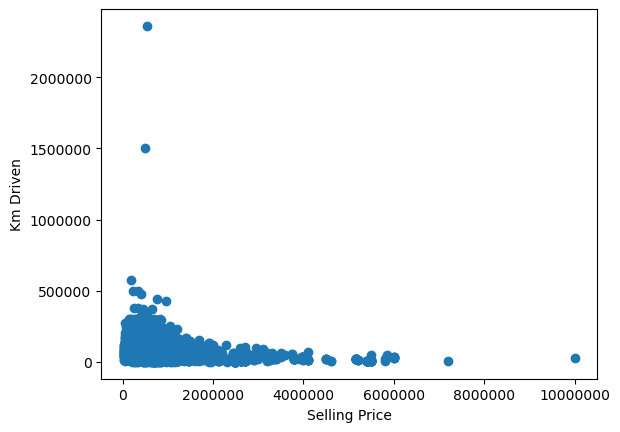

In [45]:
import matplotlib.pyplot as plt
plt.scatter(df["selling_price"],df["km_driven"])
plt.xlabel("Selling Price")
plt.ylabel("Km Driven")
plt.ticklabel_format(style="plain") #shows actual format by removing default scientific
plt.show()

#outliar --> unexpected data /general pattern not following (2 outliars at 1500000,2000000(20 lakh km ) as it is impossible or mystery to sell that much high km driven car)
#we need to remove these outliars

In [46]:
print(df["name"].value_counts())

name
Maruti Swift Dzire VDI                          129
Maruti Alto 800 LXI                              82
Maruti Alto LXi                                  71
BMW X4 M Sport X xDrive20d                       62
Maruti Swift VDI                                 61
                                               ... 
Maruti Zen Estilo Sports                          1
Skoda Fabia 1.4 TDI Ambiente                      1
Mahindra Scorpio VLX 2WD AT BSIII                 1
Renault KWID Climber 1.0 AMT                      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV      1
Name: count, Length: 1979, dtype: int64


In [47]:
def abc(x):  #simplifying data by taking brand and car name 
    brand=x.split()[0]
    name=x.split()[1]
    return brand   #as we need to relationship related to selling price only
df["name"]=df["name"].apply(abc)
print(df["name"].value_counts())

name
Maruti           2366
Hyundai          1359
Mahindra          758
Tata              719
Honda             465
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        184
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               41
Audi               37
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Name: count, dtype: int64


In [48]:
pd.options.display.float_format="{:.2f}".format #remove the scientific notation
g=df.groupby("name") #k,v k -> jiske basis pr grouping hui h and v is value (for printing g as it is already grouped) 
mean=g["selling_price"].mean() #all brand names group and selling price of that particular brand group thn found mean of it 
print(mean)

name
Ambassador       124000.00
Ashok            300000.00
Audi            2319432.35
BMW             4153813.56
Chevrolet        273867.48
Daewoo            77000.00
Datsun           314599.95
Fiat             317195.07
Force            887500.00
Ford             520873.67
Honda            593903.51
Hyundai          473511.00
Isuzu           1942000.00
Jaguar          2915464.79
Jeep            2149612.87
Kia             1504500.00
Land            3608333.33
Lexus           5150000.00
MG              1783333.33
Mahindra         630021.07
Maruti           409091.03
Mercedes-Benz   2470444.44
Mitsubishi       817500.00
Nissan           465407.36
Opel              68000.00
Renault          462618.38
Skoda            609721.12
Tata             361853.83
Toyota          1011920.31
Volkswagen       485217.38
Volvo           3272014.93
Name: selling_price, dtype: float64


In [49]:
#sort the name column in descending order
m=mean.sort_values(ascending=False)
m

name
Lexus           5150000.00
BMW             4153813.56
Land            3608333.33
Volvo           3272014.93
Jaguar          2915464.79
Mercedes-Benz   2470444.44
Audi            2319432.35
Jeep            2149612.87
Isuzu           1942000.00
MG              1783333.33
Kia             1504500.00
Toyota          1011920.31
Force            887500.00
Mitsubishi       817500.00
Mahindra         630021.07
Skoda            609721.12
Honda            593903.51
Ford             520873.67
Volkswagen       485217.38
Hyundai          473511.00
Nissan           465407.36
Renault          462618.38
Maruti           409091.03
Tata             361853.83
Fiat             317195.07
Datsun           314599.95
Ashok            300000.00
Chevrolet        273867.48
Ambassador       124000.00
Daewoo            77000.00
Opel              68000.00
Name: selling_price, dtype: float64

In [50]:
def fxn(x):
    if x in m.index[:12]:
        return 2   #Expensive cars #High end cars
    elif x in m.index[12:24]:
        return 1 #family cars
    else:
        return 0 #low end cars
df["name"]=df["name"].apply(fxn)
print(df["name"].value_counts()) #segment divide #without using encoding we have converted #acc to required simplify data by doing grouping #upto this used some feature engineering now to do statistical analysis

name
1    6672
2     882
0     345
Name: count, dtype: int64


In [51]:
#Statistical Analysis-> advance part of ML 
#When we are unable to know about data by just watching it,we can simply use statistical analysis
# 2 Things -> Feature selection #Outliar detection
#Feature selection-> Important features to consider wrt dependent variable -->it is a statistical method to select important features(columns) based on their statistical meaning with respect to dependent variable
# outliar detection -> Removing those samples which are out of particular pattern or data
# 4 cases-> for assumption test (hypothesis)  
# Independent      dependent        Test  
  # numeric          numeric          pearson corelation test
  # numeric          categorical      ANOVA test
  # categorical      numeric          ANOVA test
  # categorical      categorical      chi sqare test


numeric = df[["selling_price","km_driven","max_power","engine","mileage","year"]]
category=df[["fuel","transmission","seller_type","owner","seats","name"]]


In [52]:
category["fuel"]=category["fuel"].replace({"Diesel":0,"Petrol":1,"Eco":2})              #coding for statistical analysis only not using encoding to convert columns
category["transmission"]=category["transmission"].replace({"Manual":0,"Automatic":1})
category["seller_type"]=category["seller_type"].replace({"Individual":0,"Dealer":1,"Trustmark Dealer":2})
category["owner"]=category["owner"].replace({"First Owner":0,"Second Owner":1,"Third Owner":2,"Fourth & Above Owner":3})


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25696\1279088442.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  category["fuel"]=category["fuel"].replace({"Diesel":0,"Petrol":1,"Eco":2})              #coding for statistical analysis only not using encoding to convert columns
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25696\1279088442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category["fuel"]=category["fuel"].replace({"Diesel":0,"Petrol":1,"Eco":2})              #coding for statistical analysis only not us

In [53]:
#pearson corelation test goes till +1 -> -1  Tells relation with target +ve or -ve # numerical data relation to show
n=numeric.corr()
print(n)

               selling_price  km_driven  max_power  engine  mileage  year
selling_price           1.00      -0.22       0.75    0.46    -0.12  0.41
km_driven              -0.22       1.00      -0.04    0.21    -0.17 -0.43
max_power               0.75      -0.04       1.00    0.70    -0.37  0.23
engine                  0.46       0.21       0.70    1.00    -0.58  0.02
mileage                -0.12      -0.17      -0.37   -0.58     1.00  0.33
year                    0.41      -0.43       0.23    0.02     0.33  1.00


<Axes: >

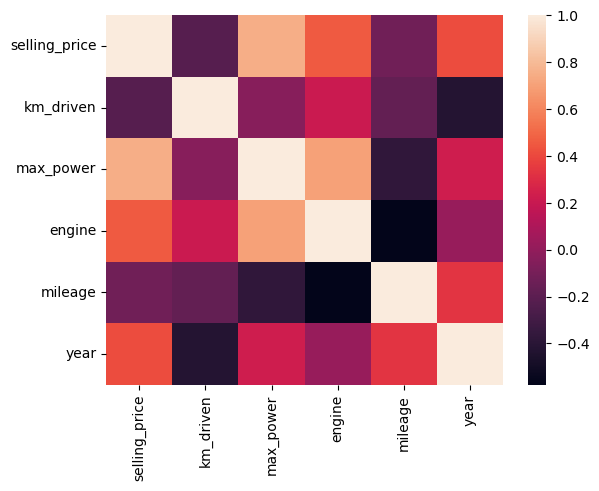

In [54]:
#seaborn's new visual heatmap
import seaborn
seaborn.heatmap(n) #to show above like corelation visual(tells in color) light->+ve relation and much dark->negative relation


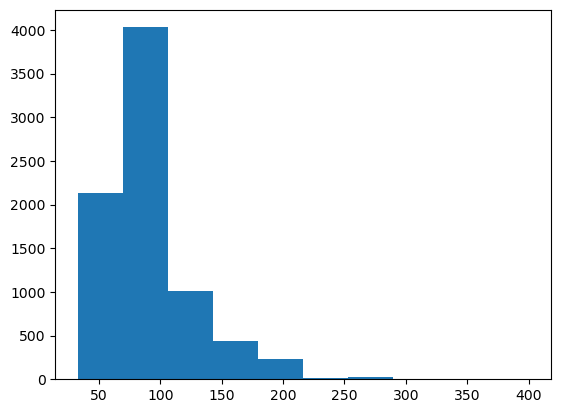

In [55]:
import matplotlib.pyplot as plt
plt.hist(df["max_power"]) #positive skewness(not perfect bell shaped)
plt.show()


In [56]:
print(df["max_power"].skew()) #to find value of skewness by coding not formula (+ve skewness)  # positive or negative skewness no range,can go till any

1.6423762


In [57]:
#kurtosis ->the amount of flatness of normal curve of data 
#bell shaped range -> -1 to 1 

#ANOVA
#analysis of variance(variety of distribution) (impact on target if variance as variety in data comes )  #if no variance ,thn can delete column #used to show variance only
#It is used to find f score that is used to chk if there is relationship b/w category and numerical column
#ANOVA does hypothesis testing(assumption and we need to prove it)
# 2 types of Hypothesis -> 1.NULL Hypothesis  2. Alternative Hypothesis
# NULL -> variance of all the categories is same(accept or reject on the basis of f score) 
# Alternative -> variance of all the categories is not same 
# if variance in data (data is distributed) thn Alternative(accept) else Null(it will reject on the basis of f_score)

#ANOVA Test (for now we select 3 best )
from sklearn.feature_selection import f_classif,SelectKBest       #Ques--> this is feature selection???
#f_classif --->performing anova test and calculating the f-score
#selectkBest --->used to select the top columns important wrt to the dependent column based on the highest fscore

select =SelectKBest(f_classif,k=3) # selectKBest and k=3 top 3 best / top columns select which have highest f score  #Ques????how it comes to know that which to take categorial and which numeric.is it auto taking??
#print(category) #f score with res to  target
columns=select.fit_transform(category,numeric["selling_price"]) #what's the use of storing value in column
print(select.scores_)  #Ques showing f score??with the help of only select and no use of column here

#It auto takes 3 best columns acc to f_score
#Ques?????? ex->  if 2.01< 6.75 then   #Ques------------------------> Why are we doing feature selection ???????and calculating f_score 

[ 3.48813437 12.03276301  6.7549591   3.72507073  2.66180735  9.81551122]


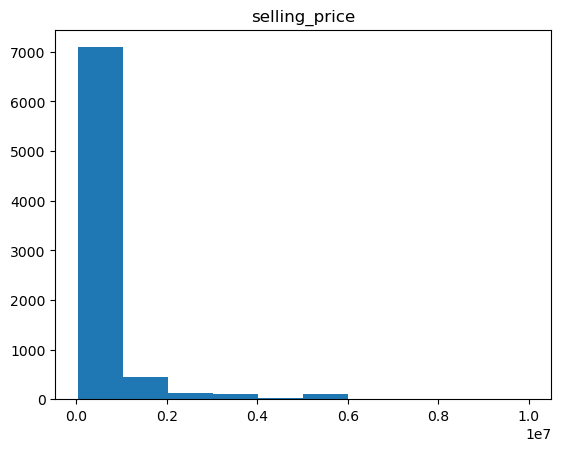

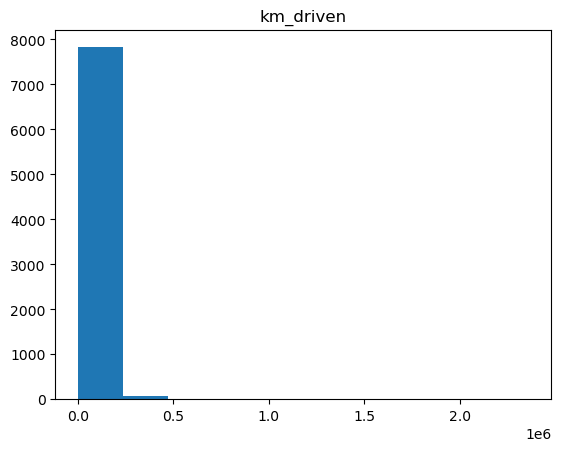

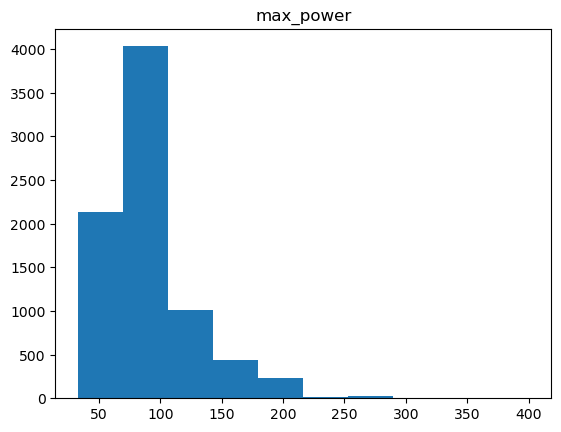

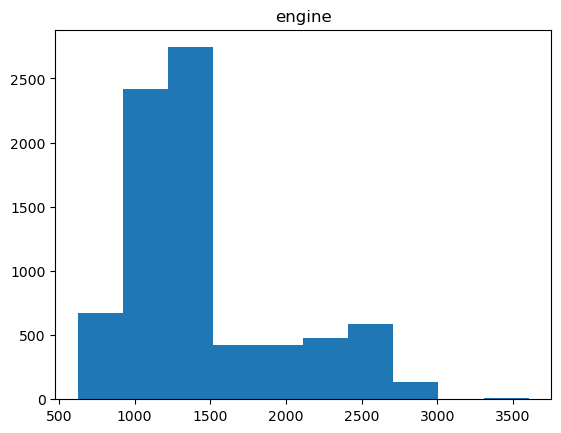

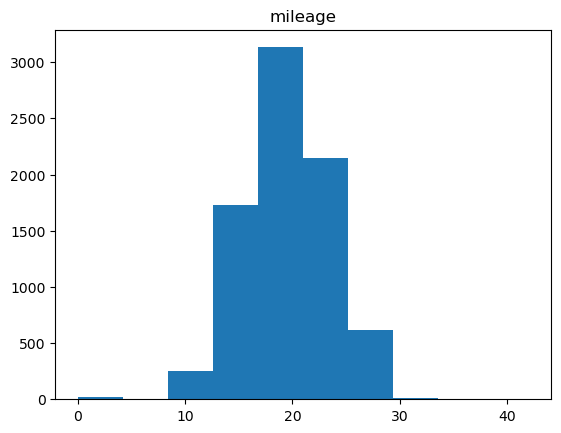

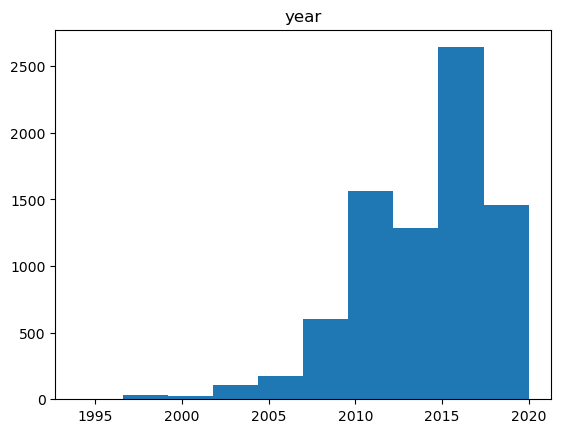

In [58]:
#Outliar Detection
# r2_score accuracy and also value of mean is affected due to Outliars ex- In Income Tax examination/for raid (by studying transactions pattern )  
# 2 Cases 
# Case 1 -> when data is normally distributed
# case 2 --> when data is pure random(belongs to unknown distribution)

#Case 1
# print(numeric.columns) 
for column in numeric.columns:        #doing to chk bell-shape is coming or not #At engine bell shape not coming(so undistrib. data) as flat after high so not proper, at others coming     
    plt.hist(numeric[column])  #Ques???? km driven le6 as there values are in lakhs???  
    plt.title(column)
    plt.show()

In [59]:
x=df["mileage"].mean()
print(x)

a=df["mileage"].std()
print(a)

19.421303
4.036935329437256


In [60]:
# z score
# returns standard deviation of each data point wrt mean   Ques?????
# z score = x-x(mean) % std dev
# if a z score of a point is less than -3 or more than +3 then it will be considered as an outliar(range default set)

# index=[]

# a=df["km_driven"].mean()
# b=df["km_driven"].std()
# # print(a)
# # print(b)
# f= (df["km_driven"]-a)//b  
# f1= (f>3) | (f<-3)
# # f2= f<-3 
# for i in df["km_driven"]: 
#     f=((i-a)//b) 
#     if (f>3) | (f<-3) :       
#         index.append(i) 
# print(index)    

# print(df.loc[f1].index) 
# print(df.loc[f2])
# print(index)

#z score
def out_detect(column):
    mean=column.mean()
    std=column.std()
    z_score=(column-mean)/std
    return column[(z_score>3) | (z_score < -3)]  

outlier=out_detect(numeric["km_driven"])
f=numeric["km_driven"].isin(outlier)
# print(outlier) 
numeric=numeric[~f]
category=category[~f]

outlier1=out_detect(numeric["max_power"])
f=numeric["max_power"].isin(outlier1)
numeric=numeric[~f]
category=category[~f]

outlier2=out_detect(numeric["mileage"])  #mileage done outlier detection like this by z_score as normal distribution
f=numeric["mileage"].isin(outlier2)
numeric=numeric[~f]
category=category[~f]

In [61]:
numeric=numeric.reset_index(drop=True)
numeric

,selling_price,km_driven,max_power,engine,mileage,year
0,450000,145500,74.00,1248.00,23.40,2014
1,370000,120000,103.52,1498.00,21.14,2014
2,158000,140000,78.00,1497.00,17.70,2006
3,225000,127000,90.00,1396.00,23.00,2010
4,130000,120000,88.20,1298.00,16.10,2007
...,...,...,...,...,...,...
7711,320000,110000,82.85,1197.00,18.50,2013
7712,135000,119000,110.00,1493.00,16.80,2007
7713,382000,120000,73.90,1248.00,19.30,2009
7714,290000,25000,70.00,1396.00,23.57,2013


In [62]:
category=category.reset_index(drop=True)
category

,fuel,transmission,seller_type,owner,seats,name
0,0,0,0,0,5.00,1
1,0,0,0,1,5.00,1
2,1,0,0,2,5.00,1
3,0,0,0,0,5.00,1
4,1,0,0,0,5.00,1
...,...,...,...,...,...,...
7711,1,0,0,0,5.00,1
7712,0,0,0,3,5.00,1
7713,0,0,0,0,5.00,1
7714,0,0,0,0,5.00,1


In [63]:
# Case 2--> When data is pure random(distribution we don't know/unknown dist)
# delete outlier from engine column because it has unknown distribution(not normal dist. as not bell shaped)(we came to know abt unknown dist by hist.graph above)   
# whenever in any algorithm there is distance calculation then we always have to scale the data.(clustering in unsupervised learning)
# MinMaxScaler(minmax scaling ->normalisation)   #Ques--> formula of z score and normalisation same????? and wt is standardization and normalisation and concept of range fixed and range not fixed
#normalization in which range is fixed and value scale b/w 0-1
data=numeric[["engine","selling_price"]] 
from sklearn.preprocessing import MinMaxScaler  #MinMaxScaler is in normalisation like StandardScaler in Standard Scaling 
Scaler=MinMaxScaler()                    
data=Scaler.fit_transform(data)          #Ques---> we are like doing encoding here?????????just like standard scaler
print(data) #returns in numpy array ohe and in this scaler #output same like standard scaler

[[0.24242424 0.07279046]
 [0.33954934 0.05892564]
 [0.33916084 0.02218388]
 ...
 [0.24242424 0.06100536]
 [0.2999223  0.04506082]
 [0.2999223  0.04506082]]


In [64]:
#DBSCAN algo (density based spatial clustering of applications with noise)  #comes under unsupervised learning as makes clusters
import numpy as np
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.06,min_samples=10) #0.06 is radius that we are taking
dbscan.fit(data)  #data learn after scaling preprocessing 
labels=dbscan.labels_     #made labels of diff diff datapoints like 3 point wale ka ek label
print(np.unique(labels,return_counts=True)) #-1 is noise points, provided labels to certain points shown in output, from the data,noise points is imp only -> now to chk how many -1 points usne dale h(so use return_counts=True)  
#eps  -> epsilons
#samples whose circle contain similar no. of points are labeled as one category
#those samples whose circle donot contain any data point are labeled as -1 always.


(array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64), array([  24, 6148, 1319,   56,   24,   41,   67,   12,   25], dtype=int64))


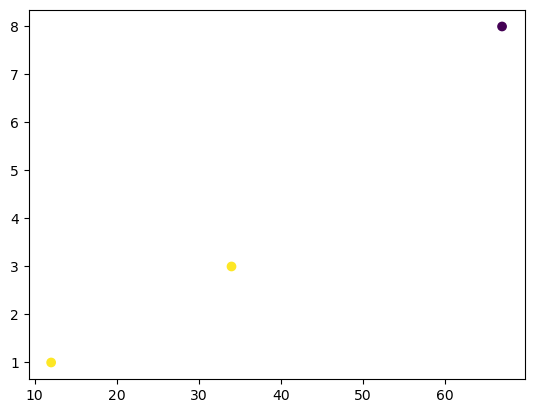

In [65]:
a=[12,34,67]
b=[1,3,8]
color=[1,1,0] #scatter plot feature can give number
plt.scatter(a,b,c=color)  #not imp to give color name always in scatter plot auto take if give in number state
plt.show()

In [66]:
l=np.where(labels>-1,0,1) # greater than -1 data points will give 0 color and less than -1 give color 1 #value if true 0 value if false 1 color
# plt.scatter(df["engine"],df["selling_price"],c=l)  #will give error as outliers are remove of all the file so false situ not work
plt.show() # 8 (-1) found through our eyes others are hidden b/w other color data points #so we can't give conclusion seeing only graph

In [67]:
#how to decide value of epsilon and min samples
# epsilon value is decided or described based on the average distance of each point to its nearest neighbors to see that we make a K distance graph.
# min neighbors/samples are decided based upon the domain knowledge or project requirement
#steps for making K Graph
# step 1 -> scale your data(like done minmaxscaler)
# step 2 -> to find the nearest neighbor points of each sample
# than find the distance between them and then the graph of distance is made

from sklearn.neighbors import NearestNeighbors #this class is to find nearest neighbor of each sample
nn=NearestNeighbors(n_neighbors=10) # distance from 10 nearest neighbors taking  --> Ques???? right said <-- min_sample value decided from here???????
nn.fit(data) 
distance,index=nn.kneighbors(data) 
print(distance) #In first line output ,its taking distance of self so 0 #output is nearest neighbor point's distances ????? 

#Ques--> From where are we seeing in graph/deciding nearest neighbor from k graph????? <--- ans -> but we are finding/deciding no. of epsilons through it

# elbow method in DBSCAN
#This method involves plotting the curve of the average distance between,points and their nearest neighbor (k-dist graph), and finding the point where the curve 
#starts to bend. This point can be considered as a good value for eps.

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00034662 0.00086655 ... 0.00177611 0.00177611 0.00189931]
 [0.         0.00034662 0.00034662 ... 0.00138648 0.00138648 0.00138648]
 ...
 [0.         0.00034662 0.00034662 ... 0.00034662 0.00034662 0.00034662]
 [0.         0.         0.         ... 0.0017331  0.0017331  0.0017331 ]
 [0.         0.         0.         ... 0.0017331  0.0017331  0.0017331 ]]


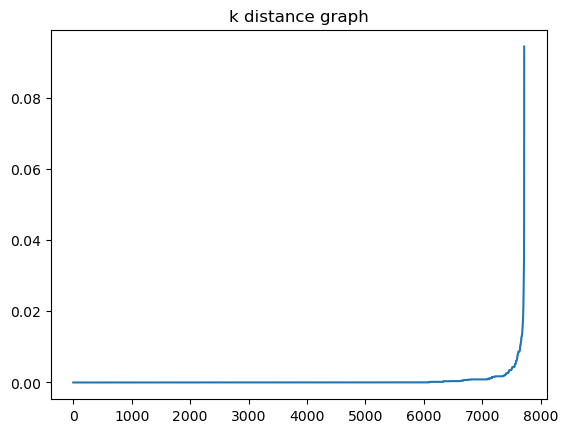

In [68]:
distance = distance[:,1] 
distance=np.sort(distance,axis=0) #always to sort in ascending order  #Ques -> axis=0 ?????
plt.plot(distance)
plt.title("k distance graph") #no. of clusters determine in it
plt.show()

In [69]:
f= labels != -1
numeric=numeric[f]
numeric

,selling_price,km_driven,max_power,engine,mileage,year
0,450000,145500,74.00,1248.00,23.40,2014
1,370000,120000,103.52,1498.00,21.14,2014
2,158000,140000,78.00,1497.00,17.70,2006
3,225000,127000,90.00,1396.00,23.00,2010
4,130000,120000,88.20,1298.00,16.10,2007
...,...,...,...,...,...,...
7711,320000,110000,82.85,1197.00,18.50,2013
7712,135000,119000,110.00,1493.00,16.80,2007
7713,382000,120000,73.90,1248.00,19.30,2009
7714,290000,25000,70.00,1396.00,23.57,2013


In [70]:
numeric=numeric.reset_index(drop=True)

In [71]:
numeric

,selling_price,km_driven,max_power,engine,mileage,year
0,450000,145500,74.00,1248.00,23.40,2014
1,370000,120000,103.52,1498.00,21.14,2014
2,158000,140000,78.00,1497.00,17.70,2006
3,225000,127000,90.00,1396.00,23.00,2010
4,130000,120000,88.20,1298.00,16.10,2007
...,...,...,...,...,...,...
7687,320000,110000,82.85,1197.00,18.50,2013
7688,135000,119000,110.00,1493.00,16.80,2007
7689,382000,120000,73.90,1248.00,19.30,2009
7690,290000,25000,70.00,1396.00,23.57,2013


In [72]:
category

,fuel,transmission,seller_type,owner,seats,name
0,0,0,0,0,5.00,1
1,0,0,0,1,5.00,1
2,1,0,0,2,5.00,1
3,0,0,0,0,5.00,1
4,1,0,0,0,5.00,1
...,...,...,...,...,...,...
7711,1,0,0,0,5.00,1
7712,0,0,0,3,5.00,1
7713,0,0,0,0,5.00,1
7714,0,0,0,0,5.00,1


In [73]:
f=labels!= -1  #we also have to remove outlier rows from the category as otherwise we can't attach numeric and category columns both at end
category=category[f]
category

,fuel,transmission,seller_type,owner,seats,name
0,0,0,0,0,5.00,1
1,0,0,0,1,5.00,1
2,1,0,0,2,5.00,1
3,0,0,0,0,5.00,1
4,1,0,0,0,5.00,1
...,...,...,...,...,...,...
7711,1,0,0,0,5.00,1
7712,0,0,0,3,5.00,1
7713,0,0,0,0,5.00,1
7714,0,0,0,0,5.00,1


In [74]:
category=category.reset_index(drop=True)

In [75]:
category

,fuel,transmission,seller_type,owner,seats,name
0,0,0,0,0,5.00,1
1,0,0,0,1,5.00,1
2,1,0,0,2,5.00,1
3,0,0,0,0,5.00,1
4,1,0,0,0,5.00,1
...,...,...,...,...,...,...
7687,1,0,0,0,5.00,1
7688,0,0,0,3,5.00,1
7689,0,0,0,0,5.00,1
7690,0,0,0,0,5.00,1


In [76]:
final_df=pd.concat((numeric,category),axis=1) #columnwise concat so axis=1 
final_df

,selling_price,km_driven,max_power,engine,mileage,year,fuel,transmission,seller_type,owner,seats,name
0,450000,145500,74.00,1248.00,23.40,2014,0,0,0,0,5.00,1
1,370000,120000,103.52,1498.00,21.14,2014,0,0,0,1,5.00,1
2,158000,140000,78.00,1497.00,17.70,2006,1,0,0,2,5.00,1
3,225000,127000,90.00,1396.00,23.00,2010,0,0,0,0,5.00,1
4,130000,120000,88.20,1298.00,16.10,2007,1,0,0,0,5.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7687,320000,110000,82.85,1197.00,18.50,2013,1,0,0,0,5.00,1
7688,135000,119000,110.00,1493.00,16.80,2007,0,0,0,3,5.00,1
7689,382000,120000,73.90,1248.00,19.30,2009,0,0,0,0,5.00,1
7690,290000,25000,70.00,1396.00,23.57,2013,0,0,0,0,5.00,1


In [77]:
y=final_df["selling_price"]
x=final_df.drop(columns="selling_price")
x #to remove as it is target

,km_driven,max_power,engine,mileage,year,fuel,transmission,seller_type,owner,seats,name
0,145500,74.00,1248.00,23.40,2014,0,0,0,0,5.00,1
1,120000,103.52,1498.00,21.14,2014,0,0,0,1,5.00,1
2,140000,78.00,1497.00,17.70,2006,1,0,0,2,5.00,1
3,127000,90.00,1396.00,23.00,2010,0,0,0,0,5.00,1
4,120000,88.20,1298.00,16.10,2007,1,0,0,0,5.00,1
...,...,...,...,...,...,...,...,...,...,...,...
7687,110000,82.85,1197.00,18.50,2013,1,0,0,0,5.00,1
7688,119000,110.00,1493.00,16.80,2007,0,0,0,3,5.00,1
7689,120000,73.90,1248.00,19.30,2009,0,0,0,0,5.00,1
7690,25000,70.00,1396.00,23.57,2013,0,0,0,0,5.00,1


In [78]:
#encoding
#only we have to convert seller_type as not in ohe so to do encoding rather it is encoded then also to do
#in all other rest columns like fuel,transmission,owner,seats,name we done label encoding 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder      

ct=ColumnTransformer([("encode",OneHotEncoder(drop="first"),[7])],remainder="passthrough")
x=ct.fit_transform(x)
x

array([[0.000e+00, 0.000e+00, 1.455e+05, ..., 0.000e+00, 5.000e+00,
        1.000e+00],
       [0.000e+00, 0.000e+00, 1.200e+05, ..., 1.000e+00, 5.000e+00,
        1.000e+00],
       [0.000e+00, 0.000e+00, 1.400e+05, ..., 2.000e+00, 5.000e+00,
        1.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 1.200e+05, ..., 0.000e+00, 5.000e+00,
        1.000e+00],
       [0.000e+00, 0.000e+00, 2.500e+04, ..., 0.000e+00, 5.000e+00,
        1.000e+00],
       [0.000e+00, 0.000e+00, 2.500e+04, ..., 0.000e+00, 5.000e+00,
        1.000e+00]])

In [79]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
# x

In [151]:
from sklearn.model_selection import train_test_split   
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train

3769    550000
4947    500000
2267    390000
6832    600000
4347    599000
         ...  
4056    120000
1843    444000
4891    300000
2824    409999
3667    450000
Name: selling_price, Length: 1539, dtype: int64

In [81]:
from sklearn.ensemble import RandomForestRegressor  #Regressor used as data of dependent var is in the form of any range(not fixed) ,range is not fixed (so classification not used)
rfr=RandomForestRegressor(n_estimators=100)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9802908774729667
